In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip \*.zip  && rm *.zip

In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

SEED = 0

In [93]:
data = pd.read_csv("creditcard.csv", header=0)
#print(data.info())

In [94]:
#Handle Duplicated values
print("Duplicates", data.duplicated().sum())
data = data.drop_duplicates()
print("Rows {}, Columns {}".format(data.shape[0], data.shape[1]))

Duplicates 1081
Rows 283726, Columns 31


In [95]:
#Convert All majority class to 1 and minority to -1 for oneclass svm
data['Class'] = data['Class'].replace({0: 1, 1: -1})
#data['Class'].unique()
data['Class'].value_counts()

Class
 1    283253
-1       473
Name: count, dtype: int64

In [96]:
x_majority = data[data["Class"]==1]
y_majority = x_majority["Class"]
x_majority = x_majority.drop(columns=["Class"])
x_minority = data[data["Class"]==-1]
y_minority = x_minority["Class"]
x_minority = x_minority.drop(columns=["Class"])

In [97]:
X_train, X_test, y_train, y_test = train_test_split( x_majority, y_majority, test_size=0.2, random_state=SEED )
X_test = pd.concat([X_test,x_minority],axis=0)
y_test = pd.concat([y_test,y_minority],axis=0)


In [ ]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')
ocsvm.fit(X_train)
y_pred = ocsvm.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
# Calculate and print the performance metrics
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("F1 Score: {:.2f}%".format(f1_score(y_test, y_pred) * 100))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))
print("Classification report\n", classification_report(y_test, y_pred))

In [106]:
%%time
ocsvm_grid = OneClassSVM()
param_grid = {'kernel': ['rbf','linear','poly'],'nu' : [0.1,0.5,0.9],'gamma': ['scale','auto']}
grid_best_ocsvm = GridSearchCV(ocsvm_grid, param_grid=param_grid, scoring='f1',return_train_score=True,verbose=2,n_jobs=-1,cv=2)
grid_search_svm=grid_best_ocsvm.fit(X_train,np.ones(X_train.shape[0],dtype=np.int8))
print(grid_search_svm.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END .................gamma=scale, kernel=linear, nu=0.1; total time= 2.3min
[CV] END .................gamma=scale, kernel=linear, nu=0.1; total time= 4.6min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.1; total time= 3.8min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.1; total time= 3.7min
[CV] END .................gamma=scale, kernel=linear, nu=0.5; total time=15.2min
[CV] END .................gamma=scale, kernel=linear, nu=0.5; total time=14.9min
[CV] END ...................gamma=scale, kernel=poly, nu=0.1; total time= 2.4min


/Users/arjunramesh/Desktop/Spring23/Projects/jupyter_test/.venv/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...................gamma=scale, kernel=poly, nu=0.1; total time= 2.5min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.5; total time=23.3min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.5; total time=23.4min
[CV] END ...................gamma=scale, kernel=poly, nu=0.5; total time=13.8min
[CV] END .................gamma=scale, kernel=linear, nu=0.9; total time=30.1min
[CV] END .................gamma=scale, kernel=linear, nu=0.9; total time=31.3min
[CV] END ...................gamma=scale, kernel=poly, nu=0.5; total time=13.9min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.9; total time=45.4min
[CV] END ....................gamma=scale, kernel=rbf, nu=0.9; total time=45.5min
[CV] END ...................gamma=scale, kernel=poly, nu=0.9; total time=30.0min
[CV] END ...................gamma=scale, kernel=poly, nu=0.9; total time=30.1min
[CV] END ..................gamma=auto, kernel=linear, nu=0.1; total time= 2.1min
[CV] END ..................g

In [107]:
ocsvm = OneClassSVM(kernel='linear', nu=0.1, gamma='scale')
ocsvm.fit(X_train)
y_pred = ocsvm.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          -1       0.20      0.02      0.03      5669
           1       0.90      0.99      0.94     51455

    accuracy                           0.90     57124
   macro avg       0.55      0.50      0.49     57124
weighted avg       0.83      0.90      0.85     57124



In [116]:
print(confusion_matrix(y_test,y_pred))

[[   93   380]
 [ 5576 51075]]


In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=[-1,1])

Confusion matrix:
[[   93   380]
 [ 5576 51075]]


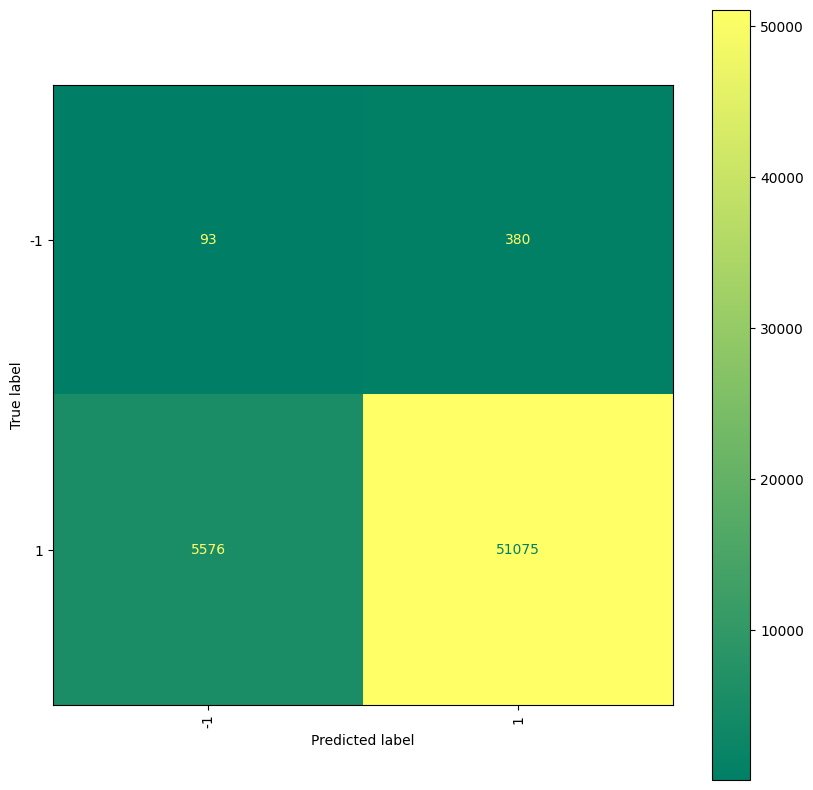

In [115]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')
plt.show()